In [1]:
# Load in packages for pandas, astropy, etc. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from astropy.io import ascii
from astropy.table import Column, MaskedColumn
from astropy.io.ascii import masked
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.cosmology import LambdaCDM 
from astroquery.simbad import Simbad
from astroquery.sdss import SDSS
from astropy.coordinates import match_coordinates_sky
import os 
import json 

cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7) #Creating our choice of cosmology here...

pd.set_option('display.max_columns', 300) # Setting max number of rows per df to be the size of the df
pd.set_option('display.max_rows', None)




In [2]:
# reading in the formatted version DR0p8
MAC = pd.read_csv('MAC_DR0p9.csv', sep=',')


In [3]:
import ast

def get_selection_method(waveband, technique):
    def filter_function(row):
        # Access the value in the 'Parsed Selection Method' column
        selection_method = row['Parsed Selection Method']
        
        # If the value is a string, convert it back to a dictionary
        if isinstance(selection_method, str):
            try:
                selection_dict = ast.literal_eval(selection_method)
            except ValueError:
                return False
        else:
            selection_dict = selection_method

        # Check if the waveband is a key and the technique is one of its values
        return str(waveband) in selection_dict and str(technique) in selection_dict[str(waveband)]

    return filter_function

def get_analysis_method(waveband, technique):
    def filter_function(row):
        # Access the value in the 'Parsed Selection Method' column
        analysis_method = row['Parsed Analysis Method']
        
        # If the value is a string, convert it back to a dictionary
        if isinstance(analysis_method, str):
            try:
                analysis_dict = ast.literal_eval(analysis_method)
            except ValueError:
                return False
        else:
            analysis_dict = analysis_method

        # Check if the waveband is a key and the technique is one of its values
        return str(waveband) in analysis_dict and str(technique) in analysis_dict[str(waveband)]

    return filter_function

## Apply the filter function with specific waveband and technique
#filter_selection = get_selection_method('Optical', 'Spectroscopy')
#df_selection = MAC[MAC.apply(filter_selection, axis=1)]
#
#filter_analysis = get_analysis_method('X-ray', 'Imaging')
#df_analysis = MAC[MAC.apply(filter_analysis, axis=1)]



In [4]:
# here we're testing out the plotting for objects that have optical spectroscopy as a selection technique

MAC1 = MAC[MAC['System Type 1: Dual AGNs']!="-99"]
MAC2 = MAC[MAC['System Type 2: Binary AGNs']!="-99"]
MAC3 = MAC[MAC['System Type 3: Recoiling AGNs']!="-99"]

#MAC1 = MAC[(MAC['Primary System Type']=='Dual AGN') | (MAC['Primary System Type']=='Dual AGN Candidate') | \
#           (MAC['Primary System Type']=='Dual SMBH Candidate') | \
#           (MAC['Primary System Type']=='Dual AGN Candidate ; Dual SMBH Candidate')]
#
#MAC2 = MAC[(MAC['Primary System Type']=='Binary AGN') | (MAC['Secondary System Type']=='Binary AGN Candidate') | \
#           (MAC['Secondary System Type']=='Binary SMBH Candidate') | (MAC['Primary System Type']=='Binary AGN Candidate') |\
#           (MAC['Primary System Type']=='Binary AGN Candidate ; Binary SMBH Candidate') | \
#           (MAC['Secondary System Type']=='Binary AGN Candidate ; Binary SMBH Candidate') | \
#          (MAC['Primary System Type']=='Binary SMBH Candidate')]
#
#MAC3 = MAC[(MAC['Primary System Type']=='Recoil Candidate') | (MAC['Secondary System Type']=='Recoil Candidate') | \
#           (MAC['Tertiary System Type']=='Recoil Candidate')]


#band = ['Optical']
#tech = ['Double-Peaked Spectroscopic Emission Lines', 'Fiber Spectroscopy', 'Spectroscopic Emission Line Ratios',\
#        'Spectroscopy','IFU Spectroscopy', 'Long-Slit Spectroscopy']

#filter_selection = get_selection_method('Optical', 'Spectroscopy')
#df_selection = MAC1[MAC1.apply(filter_selection, axis=1)]

#df_selection['Parsed Selection Method'].unique()

print(len(MAC1),len(MAC2),len(MAC3))

4336 1369 581


/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_52517/2996514922.py:167: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0.01%','0.1%','1%','10%','100%'])


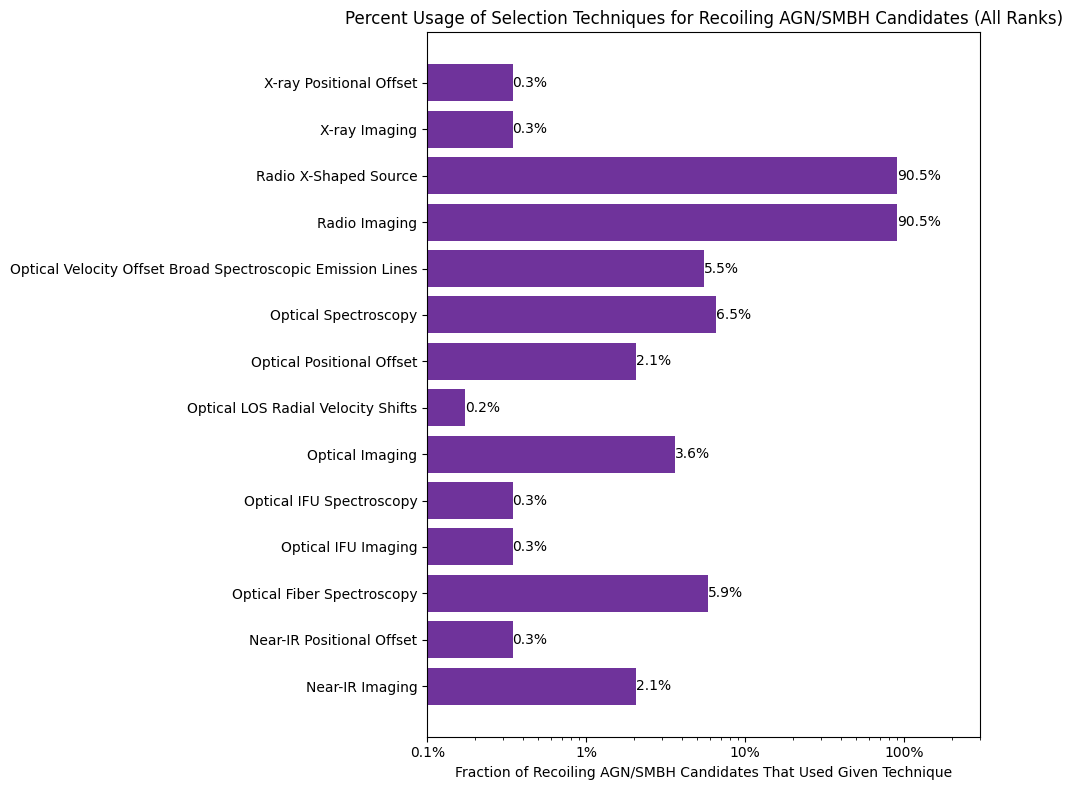

In [6]:
wavebands = ['Gamma-Ray',
 'Gamma-Ray',
 'Hard X-ray',
 'Hard X-ray',
 'Infrared',
 'Mid-IR',
 'Mid-IR',
 'Mid-IR',
 'Near-IR',
 'Near-IR',
 'Near-IR',
 'Near-IR',
 'Near-IR',
 'Near-IR',
 'Near-IR',
 'Optical',
 'Optical',
 'Optical',
 'Optical',
 'Optical',
 'Optical',
 'Optical',
 'Optical',
 'Optical',
 'Optical',
 'Optical',
 'Optical',
 'Optical',
 'Optical',
 'Optical',
 'Optical',
 'Optical',
 'Optical',   
 'Optical',
 'Mid-IR',
 'Radio',
 'Radio',
 'Radio',
 'Radio',
 'Radio',
 'Radio',
 'Radio',
 'Infrared',
 'Radio',
 'Optical',
 'Submillimeter',
 'UV',
 'UV',
 'UV',
 'X-ray',
 'X-ray',
 'X-ray',
 'X-ray',
 'X-ray']

techniques = ['Periodicity',
 'Quasi-Periodicity',
 'BAT Selection',
 'Periodicity',
 'Luminosity',
 'Colors',
 'Imaging',
 'Spectroscopy',
 'Colors',
 'Imaging',
 'Periodicity',
 'Positional Offset',
 'Quasi-Periodicity',
 'Slit Spectroscopy',
 'Spectroscopy',
 'Astrometry',
 'Fiber Spectroscopy',
 'IFU Imaging',
 'IFU Spectroscopy',
 'Imaging',
 'LOS Radial Velocity Shifts',
 'Long-Slit Spectroscopy',
 'Narrow-Band Imaging',
 'Optical LOS Radial Velocity Shifts',
 'Photometry',
 'Positional Offset',
 'Quasi-Periodicity',
 'Slit Spectroscopy',
 'Slitless Spectroscopy',
 'Spectroscopic Emission Line Ratios',
 'Spectroscopy',
 'Varstrometry',
 'Velocity Offset Broad Spectroscopic Emission Lines',
 'Optical-Mid-IR Colors',
 'Optical-Mid-IR Colors',
 'Double Jet',
 'Double Sources',
 'Imaging',
 'Periodicity',
 'Quasi-Periodicity',
 'X-Shaped Source',
 'Radio-Infrared Colors',
 'Radio-Infrared Colors',
 'Radio-Optical Offsets',
 'Radio-Optical Offsets',
 'Imaging',
 'Double-Peaked Narrow Spectroscopic Emission Lines',
 'Imaging',
 'Spectroscopy',
 'Imaging',
 'Periodicity',
 'Positional Offset',
 'Quasi-Periodicity',
 'Spectroscopy']
 
norm = len(MAC3)
labels = []
counts = []
for i, j in zip(wavebands,techniques):
    filter_selection = get_selection_method(str(i), str(j))
    df_selection = MAC3[MAC3.apply(filter_selection, axis=1)]
    if str(i)+' '+str(j) == 'Optical Imaging':
        count = len(df_selection)-1
        counts.append(count/norm)
        labels.append(str(i)+' '+str(j))
    elif str(i)+' '+str(j) == 'Radio Imaging':
        count = len(df_selection)-1
        counts.append(count/norm)
        labels.append(str(i)+' '+str(j))
    elif str(i)+' '+str(j) == 'Optical LOS Radial Velocity Shifts':
        count = len(df_selection)-4
        counts.append(count/norm)
        labels.append(str(i)+' '+str(j))
    elif str(i)+' '+str(j) == 'Optical Fiber Spectroscopy':
        count = len(df_selection)-12
        counts.append(count/norm)
        labels.append(str(i)+' '+str(j))
    elif str(i)+' '+str(j) == 'Optical Spectroscopy':
        count = len(df_selection)-13
        counts.append(count/norm)
        labels.append(str(i)+' '+str(j))
    elif str(i)+' '+str(j) == 'Optical Spectroscopic Emission Line Ratios':
        count = len(df_selection)-11
        counts.append(count/norm)
        labels.append(str(i)+' '+str(j))        
    else:
        count = len(df_selection)
        counts.append(count/norm)
        labels.append(str(i)+' '+str(j))

order = range(len(wavebands))
for i in reversed(order): # reversing our iteration order so we don't screw up our indexes
    if float((counts[i]*norm))<1.0:
        wavebands.pop(i)
        techniques.pop(i)
        counts.pop(i)
        labels.pop(i)

fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(labels, counts, color='indigo', alpha = 0.8, log=True)

for bar in bars:
    width = bar.get_width()  # Use get_width for horizontal bars
    if width > 0.0001:  # Adjust this threshold if necessary
        percentage = f'{100 * width:.1f}%'  # Calculate the percentage based on the bar's width
        ax.text(width, bar.get_y() + bar.get_height() / 2, percentage,  # Position the text at the end of the bar
                ha='left', va='center', fontsize=10)  # Adjust text alignment

ax.set_xlim([0.001, 3.0]) 

plt.rcParams['axes.formatter.min_exponent'] = 3
ax.set_xticklabels(['0.01%','0.1%','1%','10%','100%'])

plt.xlabel('Fraction of Recoiling AGN/SMBH Candidates That Used Given Technique')
plt.title('Percent Usage of Selection Techniques for Recoiling AGN/SMBH Candidates (All Ranks)')
plt.tight_layout()
plt.savefig('RecoilAGN_selectmethods_aggregate.pdf', dpi=150, bbox_inches='tight')
plt.show()



In [6]:
# we'll need to clean this up....

filter_selection = get_selection_method('Optical', 'LOS Radial Velocity Shifts')
df_selection = MAC3[MAC3.apply(filter_selection, axis=1)]
len(df_selection)

# Optical Periodicity --> get rid of
# Optical imaging --> subtract one for periodicity target, and one for inada
# optical colors --> get rid of completely

# radio imaging --> subtract 1 for the blundell target (that was used to propose a binary...)

# Optical LOS velocity shifts --> subtract four
# double peaked emission lines --> get rid of all of these
# fiber spectroscopy: subtract 12
# spec ratios: subtract 11
# double-peaked broad spec lines --> get rid of completely
# spectroscopy --> subtract 13 
# Velocity Offset Narrow Spectroscopic Emission Lines --> get rid of completely
 
# Radio jet precession --> get rid of completely
# Radio imaging --> subtract 1 (out of the two, one is an X-shaped radio source while the other was claimed as a binary)


# we need to fix near-IR imaging in Lena and make sure we're not including near-IR imaging where it shouldn't \
# be included....

df_selection

,Unnamed: 0.1,Unnamed: 0,System Type,Literature Name,Selection Method,Confirmation Method,Name1,z1,z1_type,RA1,Dec1,Coordinate_waveband1,Coordinate_Source1,Equinox1,Brightness1,Brightness_band1,Brightness_type1,Name2,z2,z2_type,RA2,Dec2,Equinox2,Coordinate_waveband2,Coordinate_Source2,Brightness2,Brightness_band2,Brightness_type2,dV,Sep,Sep(kpc),dV_rwp,Paper(s),BibCode(s),DOI(s),Notes,Confidence Flag,Processed System Type,Legacy System Type,Primary System Type,Secondary System Type,Tertiary System Type,ST1 Confidence Flag,ST2 Confidence Flag,ST3 Confidence Flag,Confirmation Methood,dV_new,Processed Selection Method,Analysis Method,Parsed Selection Method,Processed Analysis Method,Processed Confirmation Method,Parsed Analysis Method,Parsed Confirmation Method
2943,2943,3407,Recoil Candidate / Binary SMBH Candidate / Dua...,SDSS J0927+2943,Velocity Offset Broad Optical Spectroscopic Em...,-99,SDSS J0927+2943,0.71300,spec,09:27:12.6487571806,+29:43:44.082086600,Optical,Gaia,J2000,18.63,V,mag,-99,-99.00000,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99.0,-99.00,-99.000000,-99.0,Komossa+2008 ; Shields+2009 ; Bogdanović+2009 ...,2008ApJ...678L..81K ; 2009ApJ...696.1367S ; 20...,https://doi.org/10.1086/588656 ; https://doi.o...,Komossa+ argues that J0927 constitutes a likel...,0.0,Binary AGN Candidate / Binary SMBH Candidate /...,Recoil Candidate / Binary SMBH Candidate / Dua...,Dual AGN Candidate,Binary AGN Candidate ; Binary SMBH Candidate,Recoil Candidate,0.0,-1.0,-1.0,NaN,-99.000000,Optical Fiber Spectroscopy / Optical LOS Radia...,Velocity Offset Broad Optical Spectroscopic Em...,"{'Optical': ['Fiber Spectroscopy', 'LOS Radial...",Optical Fiber Spectroscopy / Optical LOS Radia...,-99,"{'Optical': ['Fiber Spectroscopy', 'LOS Radial...",{}
3099,3099,3563,Recoil Candidate,Mrk 1018,Serendipitous / Optical Spectroscopy / Velocit...,-99,Mrk 1018,0.04296,spec,02:06:15.9896281128,-00:17:29.221733688,Optical,Simbad,J2000,-99,-99,-99,-99,-99.00000,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99.0,-99.00,-99.000000,-99.0,Kim+2018,2018ApJ...861...51K,https://doi.org/10.3847/1538-4357/aac77d,Spec-z and coordinates from Simbad,0.0,Recoil Candidate,Recoil Candidate,Recoil Candidate,-99,-99,0.0,-99.0,-99.0,NaN,-99.000000,Optical LOS Radial Velocity Shifts / Optical S...,Serendipitous / Optical Spectroscopy / Velocit...,"{'Optical': ['LOS Radial Velocity Shifts', 'Sp...",Optical LOS Radial Velocity Shifts / Optical S...,-99,"{'Optical': ['LOS Radial Velocity Shifts', 'Sp...",{}
5332,5332,5804,Binary SMBH Candidate / Recoil Candidate,-99,Optical Spectroscopy / Fiber Optical Spectrosc...,-99,075819.69+421935.1,0.21160,spec,07:58:19.69,+42:19:35.1,Optical,SDSS,J2000,-100.0,-100,-100,-99,-99.00000,-99,-99,-99,-99,-99,-99,-100.0,-100,-100,-154.0,0.46,-99.000000,-99.0,Liu+2014 ; Kim+2016,2014ApJ...789..140L ; 2016ApJ...824..122K,https://doi.org/10.1088/0004-637X/789/2/140 ; ...,,0.0,Binary SMBH Candidate / Recoil Candidate,Binary SMBH Candidate / Recoil Candidate,Binary SMBH Candidate,Recoil Candidate,-99,0.0,0.0,-99.0,NaN,-99.000000,Optical Fiber Spectroscopy / Optical LOS Radia...,Optical Spectroscopy / Fiber Optical Spectrosc...,"{'Optical': ['Fiber Spectroscopy', 'LOS Radial...",Optical Fiber Spectroscopy / Optical LOS Radia...,-99,"{'Optical': ['Fiber Spectroscopy', 'LOS Radial...",{}
5564,5564,6036,Binary SMBH Candidate / Recoil Candidate / Dua...,-99,Optical Spectroscopy / Fiber Optical Spectrosc...,-99,142314.18+505537.2 / SBS 1421+511 QSO,0.27626,spec,14:23:14.1852096840,+50:55:37.285758732,Optical,GAIA,J2000,-100.0,-100,-100,SBS 1421+511 Companion,0.27576,spec,-99,-99,-99,-99,-99,-100.0,-100,-100,-290.0,3.00,12.610999,-99.0,Liu+2014 ; Sun+2016,2014ApJ...789..140L ; 2016ApJ...818...64S,https://doi.org/10.1088/0004-637X/789/2/140 ; ...,Liu+2014 examined follow-up second-epoch spe...,0.5,Binary SMBH Candidate / Dual AGN Candidate / R...,Binary SMBH Candidate / Recoil Candidate / Dua...,Dual AGN Candidate,Binary SMBH Candidate,Recoil Candidate,0.5,0.0,0.5,NaN,

In [ ]:
# and down here we're going to start working on breaking down the selection methods for the recoil candidates\
# starting

In [6]:
# now we're going to work on making individual plot comparisons for the dual AGN candidates....
filter_selection = get_selection_method('Radio', 'Imaging')
df_selection = MAC3[MAC3.apply(filter_selection, axis=1)]
#df_selection['Parsed Selection Method'].unique()


In [7]:
data = df_selection['Parsed Selection Method'].unique()
dicts = [ast.literal_eval(d) for d in data]

# Step 2: Aggregate all entries into a single list
all_entries = []
for d in dicts:
    for key, values in d.items():
        for value in values:
            all_entries.append((key, value))

# Step 3: Remove duplicates by converting list of tuples into a set
unique_entries = set(all_entries)

# Optionally, convert back to list of dictionaries or keep as list of tuples
#unique_dicts = [{k: v} for k, v in unique_entries]

#print(unique_dicts)
unique_entries_list = list(unique_entries)

# Sort the list by the first element of each tuple (the key) and then by the second element (the value)
sorted_unique_entries = sorted(unique_entries_list, key=lambda x: (x[0], x[1]))

for i in sorted_unique_entries:
    print(i)

('Near-IR', 'Imaging')
('Near-IR', 'Positional Offset')
('Optical', 'Colors')
('Optical', 'Double-Peaked Broad Spectroscopic Emission Lines')
('Optical', 'Double-Peaked Spectroscopic Emission Lines')
('Optical', 'Fiber Spectroscopy')
('Optical', 'Imaging')
('Optical', 'Periodicity')
('Optical', 'Spectroscopic Emission Line Ratios')
('Optical', 'Spectroscopy')
('Optical', 'Velocity Offset Broad Spectroscopic Emission Lines')
('Optical', 'Velocity Offset Narrow Spectroscopic Emission Lines')
('Radio', 'Imaging')
('Radio', 'Jet Precession')
('Radio', 'X-Shaped Source')


527
Radio Imaging 527
Radio X-Shaped Source 523
Radio Jet Precession 2
Optical Spectroscopy 15
Optical Fiber Spectroscopy 13
Optical Velocity Offset Broad Spectroscopic Emission Lines 1
Near-IR Imaging 1
Near-IR Positional Offset 1


/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_46025/3673173258.py:77: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_46025/3673173258.py:129: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(tech+techadd, rotation=45, ha='right', rotation_mode='anchor')
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_46025/3673173258.py:142: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_46025/3673173258.py:168: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['0.001%','0.01%','0.1%','1%','10%','100%'])


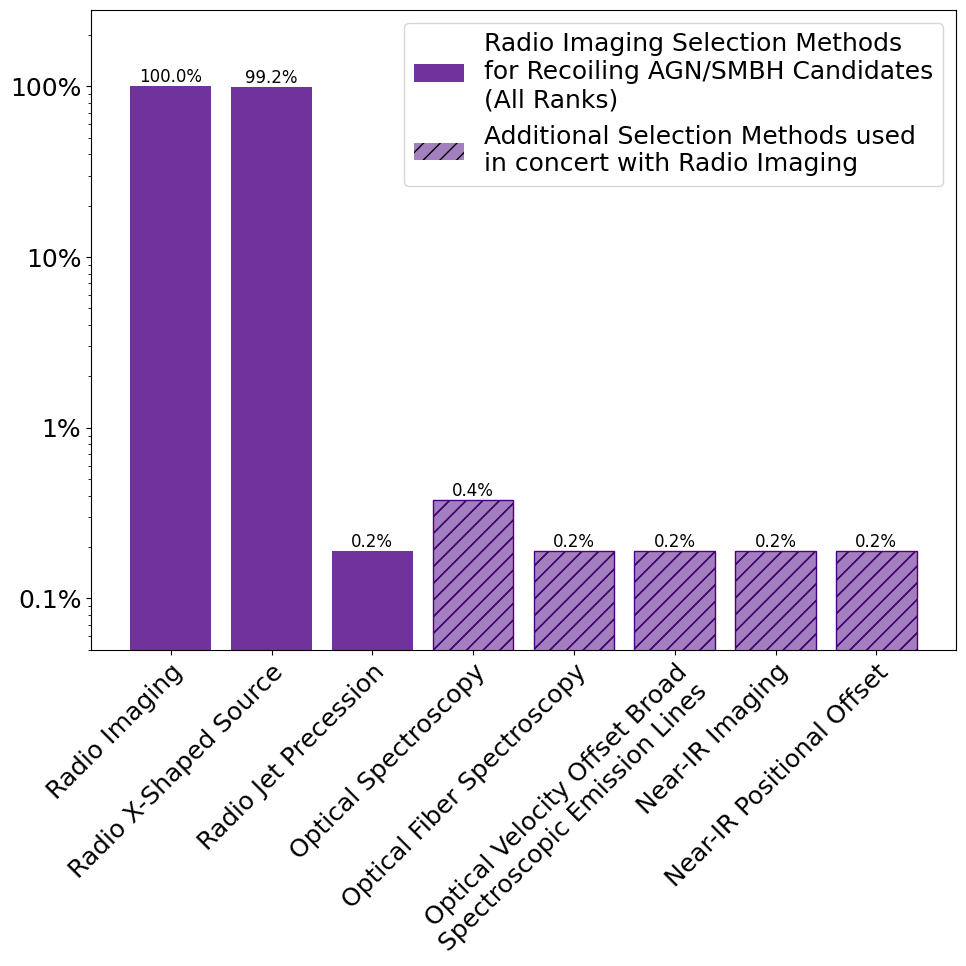

In [30]:
# and here, focusing on radio imaging
#('Near-IR', 'Imaging') *
#('Near-IR', 'Positional Offset') *
#('Optical', 'Colors') *
#('Optical', 'Double-Peaked Broad Spectroscopic Emission Lines') *
#('Optical', 'Double-Peaked Spectroscopic Emission Lines') *
#('Optical', 'Fiber Spectroscopy') *
#('Optical', 'Imaging') *
#('Optical', 'Periodicity')
#('Optical', 'Spectroscopic Emission Line Ratios') *
#('Optical', 'Spectroscopy') *
#('Optical', 'Velocity Offset Broad Spectroscopic Emission Lines') *
#('Optical', 'Velocity Offset Narrow Spectroscopic Emission Lines') *
#('Radio', 'Imaging') *
#('Radio', 'Jet Precession') *
#('Radio', 'X-Shaped Source') *

band = ['Radio']
tech1 = ['Imaging','X-Shaped Source','Jet Precession'] #'X-Shaped Source'

band2 = ['Optical']
tech2 = ['Spectroscopy','Fiber Spectroscopy',\
        'Velocity Offset Broad Spectroscopic Emission Lines'] #'Spectroscopic Emission Line Ratios'
# throwing out 'Imaging' as of 20 June 2024
#'Colors' 'Velocity Offset Narrow Spectroscopic Emission Lines' # 'Double-Peaked Spectroscopic Emission Lines'
#band2 = ['X-ray']
#tech2 = ['Imaging','Positional Offset','Spectroscopy']
#band3 = ['Hard X-ray']
#tech3 = ['BAT Selection']
band4 = ['Near-IR']
tech4 = ['Imaging','Positional Offset']
#band5 = ['Mid-IR']
#tech5 = ['Imaging','Colors']
#band6 = ['X-ray']
#tech6 = ['Imaging']
#band7 = ['Infrared']
#tech7 = ['Imaging','Radio-Infrared Colors']

bars = tech1
num = []

filter_selection = get_selection_method('Radio', 'Imaging')
gandalf = MAC3[MAC3.apply(filter_selection, axis=1)]
        
print(len(gandalf))
norm = len(gandalf)

for i in band:
    for j in tech1:
        filter_selection = get_selection_method(str(i), str(j))
        df_selection = gandalf[gandalf.apply(filter_selection, axis=1)]
        if j=='Jet Precession':
            num.append((len(df_selection)-1)/norm)
            print(str(i)+' '+str(j)+' '+str(len(df_selection)))
        else:
            num.append(len(df_selection)/norm)    
            print(str(i)+' '+str(j)+' '+str(len(df_selection)))

tech = []
for i in tech1:
    tech.append('Radio '+str(i))

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
fig, (ax1) = plt.subplots(1, 1, figsize=(10,10))
plt.rcParams.update({'font.size': 18})

#ax1.bar(tech, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.8, label='Radio Selection Methods')

bars = ax1.bar(tech, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.8, label='Radio Imaging Selection Methods\nfor Recoiling AGN/SMBH Candidates\n(All Ranks)')
for bar in bars:
    height = bar.get_height()
    if height>0.:
        percentage = f'{100*height:.1f}%'
        ax1.text(bar.get_x() + bar.get_width() / 2, height, percentage,
                ha='center', va='bottom', fontsize=12)
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')

#Optical Imaging 2 --> rremove 1 completely
#Optical Colors 1 --> remove 1 completely
#Optical Spectroscopy 15 --> 13 removed completely
#Optical Fiber Spectroscopy 13 --> 12 removed completely 
#Optical Double-Peaked Broad Spectroscopic Emission Lines 1 --> removed completely *
#Optical Double-Peaked Spectroscopic Emission Lines 9 -->removed completely *
#Optical Spectroscopic Emission Line Ratios 10 --> removed completely *
#Optical Velocity Offset Broad Spectroscopic Emission Lines 1 keep
#Optical Velocity Offset Narrow Spectroscopic Emission Lines 1 --> removed completely *

techadd=[]
num=[]

for k in band2:
    for m in tech2:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        if m=='Spectroscopy':
            num.append((len(df_selection2)-13)/norm)
            print(str(k)+' '+str(m)+' '+str(len(df_selection2)))
        elif m=='Fiber Spectroscopy':
            num.append((len(df_selection2)-12)/norm)
            print(str(k)+' '+str(m)+' '+str(len(df_selection2)))
        elif m=='Imaging':
            num.append((len(df_selection2)-1)/norm)
            print(str(k)+' '+str(m)+' '+str(len(df_selection2)))
        else:
            num.append(len(df_selection2)/norm)
            print(str(k)+' '+str(m)+' '+str(len(df_selection2)))
        #print(str(len(df_selection)) + ' ' + str(i) + ' ' + str(j) + ' ' + str(k))

for i in tech2:
    techadd.append('Optical '+str(i))

for k in band4:
    for m in tech4:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        num.append(len(df_selection2)/norm)
        print(str(k)+' '+str(m)+' '+str(len(df_selection2)))
        #print(str(len(df_selection)) + ' ' + str(i) + ' ' + str(j) + ' ' + str(k))
        # added a for loop here to remove the numbers of objects that shiould be in tehe second panel
        
for i in tech4:
    techadd.append('Near-IR '+str(i))


bars = ax1.bar(techadd, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.5, hatch='//', label='Additional Selection Methods used\nin concert with Radio Imaging')
bars_hatch = ax1.bar(techadd, num, width=0.8, bottom=None, align='center', log=True, edgecolor='indigo', color='none', hatch='//')
#xlabels =  ax1.get_xticklabels()
ax1.set_xticklabels(tech+techadd, rotation=45, ha='right', rotation_mode='anchor')
#ax1.text(0.2, 0.9, 'Object Class: Dual AGN/SMBH Candidates\nSelection Breakdown: Radio Imaging', transform=ax1.transAxes, fontsize=18)

for bar in bars:
    height = bar.get_height()
    if height>0:
        percentage = f'{100*height:.1f}%'
        ax1.text(bar.get_x() + bar.get_width() / 2, height, percentage,
                ha='center', va='bottom', fontsize=12)
current_labels = [label.get_text() for label in ax1.get_xticklabels()]
# Update the specific label
xlabels = ['Optical Velocity Offset Broad\nSpectroscopic Emission Lines' if label == 'Optical Velocity Offset Broad Spectroscopic Emission Lines' else label for label in current_labels]

ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')

ax1.legend()
# and down below here we'll focus on the methods that are independent of radio imaigng

#
#
#tech = []
#num = []
#
#bars = ax2.bar(tech, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.2, hatch='x', label='Selection Methods Independent of Radio\nImaging that Recover the Same Objects')
#xlabels = ax2.get_xticklabels()
#ax2.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
#ax2.legend()
#
#for bar in bars:
#    height = bar.get_height()
#    if height>0:
#        percentage = f'{100*height:.1f}%'
#        ax2.text(bar.get_x() + bar.get_width() / 2, height, percentage,
#                ha='center', va='bottom', fontsize=12)

ax1.set_ylim([0.0005, 2.8]) 
#ax2.set_ylim([0.0005, 2.8]) 

plt.rcParams['axes.formatter.min_exponent'] = 3
ax1.set_yticklabels(['0.001%','0.01%','0.1%','1%','10%','100%'])

#ax2.remove()
plt.tight_layout()
plt.savefig('RecoilAGN_SelectMethodFigs/recoil_breakdown_radioimaging.pdf', dpi=150)
plt.show()


#
#
# THERE IS AN ISSUE WITH JET PRECESSION. FOR SOME REASON A SUBSTANTIAL NUM DONT HAVE RADIO IMAGING LISTED
#
#
#


In [15]:
gandalf = gandalf[(gandalf['Paper(s)']!='Proctor+2011') & \
                 (gandalf['Paper(s)']!='Yang+2019') & \
                 (gandalf['Paper(s)']!='Yang+2019 ; Joshi+2019') & \
                 (gandalf['Paper(s)']!='Proctor+2011 ; Yang+2019 ; Joshi+2019')]# & \
                 #(gandalf['Paper(s)']!=) & \
                 #(gandalf['Paper(s)']!=) & \
                 #(gandalf['Paper(s)']!=) & \
                 #(gandalf['Paper(s)']!=) & \
                 #(gandalf['Paper(s)']!=) & \
                 

        
#gandalf[['Name1','Paper(s)','Primary System Type','Secondary System Type','Tertiary System Type',\
#        'Parsed Selection Method','Parsed Analysis Method','Parsed Confirmation Method']]

#Near-IR Imaging 1 these wqere both used alongside radio
#Near-IR Positional Offset 1


In [26]:
test = gandalf.copy()
for index, row in gandalf.iterrows():
    if 'Near-IR Imaging' not in row['Processed Selection Method']:
        test.drop(index, inplace=True)

test[['Name1','Paper(s)','Primary System Type','Secondary System Type','Tertiary System Type',\
        'Parsed Selection Method','Parsed Analysis Method','Parsed Confirmation Method']]



,Name1,Paper(s),Primary System Type,Secondary System Type,Tertiary System Type,Parsed Selection Method,Parsed Analysis Method,Parsed Confirmation Method
2758,NGC 3718 Bulge,Markakis+2015,Recoil Candidate,-99,-99,"{'Near-IR': ['Imaging', 'Positional Offset'], ...","{'Near-IR': ['Imaging', 'Positional Offset'], ...",{}


In [8]:
# now we're going to work on making individual plot comparisons for the dual AGN candidates....
filter_selection = get_selection_method('Radio', 'Jet Precession')
df_selection = MAC3[MAC3.apply(filter_selection, axis=1)]
#df_selection['Parsed Selection Method'].unique()

df_selection

,Unnamed: 0.1,Unnamed: 0,System Type,Literature Name,Selection Method,Confirmation Method,Name1,z1,z1_type,RA1,Dec1,Coordinate_waveband1,Coordinate_Source1,Equinox1,Brightness1,Brightness_band1,Brightness_type1,Name2,z2,z2_type,RA2,Dec2,Equinox2,Coordinate_waveband2,Coordinate_Source2,Brightness2,Brightness_band2,Brightness_type2,dV,Sep,Sep(kpc),dV_rwp,Paper(s),BibCode(s),DOI(s),Notes,Confidence Flag,Processed System Type,Legacy System Type,Primary System Type,Secondary System Type,Tertiary System Type,ST1 Confidence Flag,ST2 Confidence Flag,ST3 Confidence Flag,dV_new,Processed Selection Method,Parsed Selection Method,Analysis Method,Processed Analysis Method,Processed Confirmation Method,Parsed Analysis Method,Parsed Confirmation Method
2109,2109,2492,Recoil Candidate / Binary AGN Candidate,-99,X-Shaped Radio Source / Radio Imaging / X-Shap...,-99,3C 433,0.10137,spec,21:23:44.5778423928,+25:04:27.670672416,Optical,GAIA,J2000,16.35,V (Simbad),mag (Check Simbad),-99,-99.0,-99,-99,-99,-99,-99,-99,16.35,V (Simbad),mag (Check Simbad),-99.0,-99.0,-184.795988,-99.0,Schmidt+1965 ; Merritt+2002 ; Cheung+2007 ; Me...,2002Sci...297.1310M ; 2007AJ....133.2097C ; 2...,; https://doi.org/10.1126/science.1074688 ; h...,Krause+ claim Radio Jet Precession. I think ...,0.0,Binary AGN Candidate / Recoil Candidate,Recoil Candidate / Binary AGN Candidate,Binary AGN Candidate,Recoil Candidate,-99,0.0,0.0,-99.0,-99.0,Radio Imaging / Radio Jet Precession / Radio X...,"{'Radio': ['Imaging', 'Jet Precession', 'X-Sha...",X-Shaped Radio Source / Radio Imaging / X-Shap...,Radio Imaging / Radio Jet Precession / Radio X...,-99,"{'Radio': ['Imaging', 'Jet Precession', 'X-Sha...",{}
2969,2969,3433,Binary AGN Candidate / Recoil Candidate,E1821+643,Radio Imaging / Radio Jet Precession / Velocit...,-99,E1821+643,0.29700,spec,18:21:57.2130271440,+64:20:36.221312076,Optical,GAIA,J2000,-99,-99,-99,-99,-99.0,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99.0,-99.0,-437.914601,-99.0,Blundell+2001 ; Robinson+2010 ; Shapovalova+20...,2001ApJ...562L...5B ; 2010ApJ...717L.122R ; 20...,https://doi.org/10.1086/337970 ; https://doi.o...,Shapovalova+ claim multiple periodicities but ...,0.0,Binary AGN Candidate / Recoil Candidate,Binary AGN Candidate / Recoil Candidate,Binary AGN Candidate,Recoil Candidate,-99,0.0,0.0,-99.0,-99.0,Optical Imaging / Optical Periodicity / Optica...,"{'Optical': ['Imaging', 'Periodicity', 'Spectr...",Radio Imaging / Radio Jet Precession / Velocit...,Optical Imaging / Optical Periodicity / Optica...,-99,"{'Optical': ['Imaging', 'Periodicity', 'Spectr...",{}


In [ ]:
# and now for other methods



In [ ]:
# Optical spectroscopy now...



In [17]:
# now we're going to work on making individual plot comparisons for the dual AGN candidates....
filter_selection = get_selection_method('Optical', 'Spectroscopy')
df_selection = MAC3[MAC3.apply(filter_selection, axis=1)]
#df_selection['Parsed Selection Method'].unique()


In [18]:
data = df_selection['Parsed Selection Method'].unique()
dicts = [ast.literal_eval(d) for d in data]

# Step 2: Aggregate all entries into a single list
all_entries = []
for d in dicts:
    for key, values in d.items():
        for value in values:
            all_entries.append((key, value))

# Step 3: Remove duplicates by converting list of tuples into a set
unique_entries = set(all_entries)

# Optionally, convert back to list of dictionaries or keep as list of tuples
#unique_dicts = [{k: v} for k, v in unique_entries]

#print(unique_dicts)
unique_entries_list = list(unique_entries)

# Sort the list by the first element of each tuple (the key) and then by the second element (the value)
sorted_unique_entries = sorted(unique_entries_list, key=lambda x: (x[0], x[1]))

for i in sorted_unique_entries:
    print(i)

('Optical', 'Colors')
('Optical', 'Double-Peaked Broad Spectroscopic Emission Lines')
('Optical', 'Double-Peaked Spectroscopic Emission Lines')
('Optical', 'Fiber Spectroscopy')
('Optical', 'IFU Imaging')
('Optical', 'IFU Spectroscopy')
('Optical', 'Imaging')
('Optical', 'LOS Radial Velocity Shifts')
('Optical', 'Periodicity')
('Optical', 'Positional Offset')
('Optical', 'Spectroscopic Emission Line Ratios')
('Optical', 'Spectroscopy')
('Optical', 'Velocity Offset Broad Spectroscopic Emission Lines')
('Optical', 'Velocity Offset Narrow Spectroscopic Emission Lines')
('Radio', 'Imaging')
('Radio', 'Jet Precession')
('Radio', 'X-Shaped Source')
('X-ray', 'Imaging')
('X-ray', 'Positional Offset')


/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_46025/805301570.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gandalf.drop(index, inplace=True)
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_46025/805301570.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gandalf.drop(index, inplace=True)
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_46025/805301570.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

38
38 Optical Spectroscopy
34 Optical Fiber Spectroscopy
32 Optical Velocity Offset Broad Spectroscopic Emission Lines
2 Optical IFU Spectroscopy
1 Optical Positional Offset
5 Optical LOS Radial Velocity Shifts
6 Optical Imaging
2 Optical IFU Imaging
2 X-ray Imaging
2 X-ray Positional Offset
2 Radio Imaging


/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_46025/805301570.py:155: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(tech1+techadd, rotation=45, ha='right', rotation_mode='anchor')
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_46025/805301570.py:168: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_46025/805301570.py:194: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['0.001%','0.01%','0.1%','1%','10%','100%'])


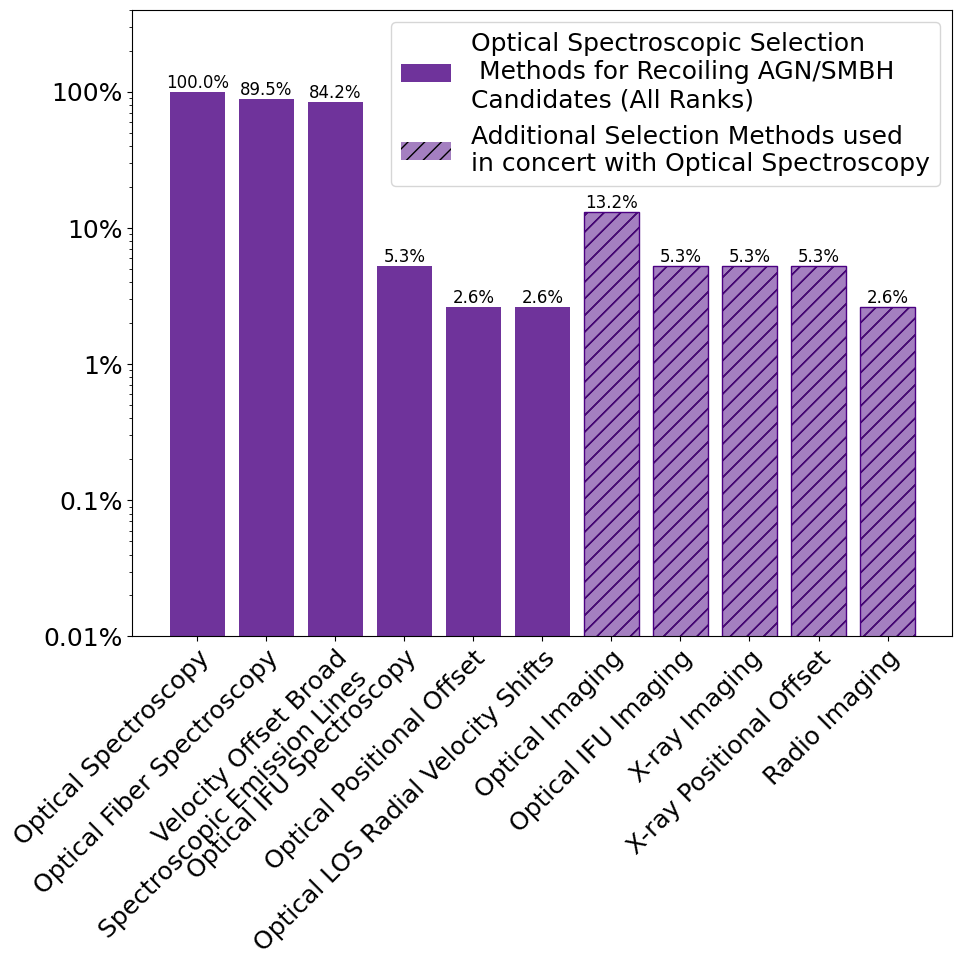

In [29]:
# here we're testing out the plotting for objects that have optical spectroscopy as a selection technique
#('Optical', 'Colors') *
#('Optical', 'Double-Peaked Broad Spectroscopic Emission Lines') *
#('Optical', 'Double-Peaked Spectroscopic Emission Lines') *
#('Optical', 'Fiber Spectroscopy') *
#('Optical', 'IFU Imaging') *
#('Optical', 'IFU Spectroscopy') *
#('Optical', 'Imaging') *
#('Optical', 'LOS Radial Velocity Shifts')*
#('Optical', 'Periodicity')**
#('Optical', 'Positional Offset')*
#('Optical', 'Spectroscopic Emission Line Ratios') *
#('Optical', 'Spectroscopy') *
#('Optical', 'Velocity Offset Broad Spectroscopic Emission Lines') *
#('Optical', 'Velocity Offset Narrow Spectroscopic Emission Lines') *
#('Radio', 'Imaging') *
#('Radio', 'Jet Precession') *
#('Radio', 'X-Shaped Source') *
#('X-ray', 'Imaging') *
#('X-ray', 'Positional Offset') *

band = ['Optical']
tech = ['Spectroscopy','Fiber Spectroscopy',\
        'Velocity Offset Broad Spectroscopic Emission Lines',
        'IFU Spectroscopy','Positional Offset',\
        'LOS Radial Velocity Shifts'] #'LOS Radial Velocity Shifts', 'Periodicity' #'Radio-Optical Positional Offsets',
#'Double-Peaked Broad Spectroscopic Emission Lines', 'Velocity Offset Narrow Spectroscopic Emission Lines',
#'Double-Peaked Spectroscopic Emission Lines', 'Double-Peaked Broad Spectroscopic Emission Lines',
band2 = ['X-ray']
tech2 = ['Imaging','Positional Offset']
band6 = ['Radio']
tech6 = ['Imaging'] #'Double Sources','Radio-Optical Positional Offsets','X-Shaped Source'


bars = tech
num = []

filter_selection = get_selection_method('Optical', 'Spectroscopy')
gandalf = MAC3[MAC3.apply(filter_selection, axis=1)]

# we have to drop the objects improperly selected via optical spectroscopy...
names=['J114016.98+174340.4','J080529.88+241004.4',\
'SDSSJ152806.63+132345.8 / J1528+1323','3C 227 / J094745.2+072518',\
'J083127.50+321926.9 / B2 0828+32',\
'J094124+394441 / 3C223.1','J161847.93+215925.4','J003636.21+004853.45','J155416.08+381132.64',\
'J091405.28+171554.36','J131638.16+242732.40','J131638.16+242732.40','J014719.27-085119.58','J011341.11+010608.50']
for i in names:
    for index, row in gandalf.iterrows():
        if row['Name1']==str(i):
            gandalf.drop(index, inplace=True)
    
print(len(gandalf))
norm = len(gandalf)

for i in band:
    for j in tech:
        filter_selection = get_selection_method(str(i), str(j))
        df_selection = gandalf[gandalf.apply(filter_selection, axis=1)]
        if j=='Imaging':
            num.append((len(df_selection)-1)/norm) 
            print(str(len(df_selection)) + ' ' + str(i) + ' ' + str(j))
        elif j=='LOS Radial Velocity Shifts':
            num.append((len(df_selection)-4)/norm) 
            print(str(len(df_selection)) + ' ' + str(i) + ' ' + str(j))
        elif j=='Spectroscopy':
            num.append((len(df_selection))/norm) 
            print(str(len(df_selection)) + ' ' + str(i) + ' ' + str(j))
        elif j=='Fiber Spectroscopy':
            num.append((len(df_selection))/norm) 
            print(str(len(df_selection)) + ' ' + str(i) + ' ' + str(j))
        else:
            num.append(len(df_selection)/norm) 
            print(str(len(df_selection)) + ' ' + str(i) + ' ' + str(j))

tech1 = []
for i in tech:
    tech1.append('Optical '+str(i))
        
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
fig, (ax1) = plt.subplots(1, 1, figsize=(10,10))
plt.rcParams.update({'font.size': 18})

#ax1.bar(tech, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.8, label='Radio Selection Methods')

bars = ax1.bar(tech1, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.8, label='Optical Spectroscopic Selection\n Methods for Recoiling AGN/SMBH\nCandidates (All Ranks)')
for bar in bars:
    height = bar.get_height()
    if height>0.0001:
        percentage = f'{100*height:.1f}%'
        ax1.text(bar.get_x() + bar.get_width() / 2, height, percentage,
                ha='center', va='bottom', fontsize=12)
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')

   

techadd=[]
num=[]

band20 = ['Optical']
tech20 = ['Imaging','IFU Imaging'] #'LOS Radial Velocity Shifts', 'Periodicity' #'Radio-Optical Positional Offsets',
for i in band20:
    for j in tech20:
        filter_selection = get_selection_method(str(i), str(j))
        df_selection = gandalf[gandalf.apply(filter_selection, axis=1)]
        if j=='Imaging':
            num.append((len(df_selection)-1)/norm) 
            print(str(len(df_selection)) + ' ' + str(i) + ' ' + str(j))
        elif j=='LOS Radial Velocity Shifts':
            num.append((len(df_selection)-4)/norm) 
            print(str(len(df_selection)) + ' ' + str(i) + ' ' + str(j))
        elif j=='Spectroscopy':
            num.append((len(df_selection))/norm) 
            print(str(len(df_selection)) + ' ' + str(i) + ' ' + str(j))
        elif j=='Fiber Spectroscopy':
            num.append((len(df_selection))/norm) 
            print(str(len(df_selection)) + ' ' + str(i) + ' ' + str(j))
        else:
            num.append(len(df_selection)/norm) 
            print(str(len(df_selection)) + ' ' + str(i) + ' ' + str(j))

for i in tech20:
    techadd.append('Optical '+str(i))
    

for k in band2:
    for m in tech2:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        num.append(len(df_selection2)/norm)
        print(str(len(df_selection2)) + ' ' + str(k) + ' ' + str(m))

for i in tech2:
    techadd.append('X-ray '+str(i))


for k in band6:
    for m in tech6:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        if m=='Imaging':
            num.append((len(df_selection2)-1)/norm)
            print(str(len(df_selection2)) + ' ' + str(k) + ' ' + str(m))
        else:
            num.append((len(df_selection2))/norm)
            print(str(len(df_selection2)) + ' ' + str(k) + ' ' + str(m))

for i in tech6:
    techadd.append('Radio '+str(i))
    

bars = ax1.bar(techadd, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.5, hatch='//', label='Additional Selection Methods used\nin concert with Optical Spectroscopy')
bars_hatch = ax1.bar(techadd, num, width=0.8, bottom=None, align='center', log=True, edgecolor='indigo', color='none', hatch='//')
#xlabels =  ax1.get_xticklabels()
ax1.set_xticklabels(tech1+techadd, rotation=45, ha='right', rotation_mode='anchor')
#ax1.text(0.2, 0.9, 'Object Class: Dual AGN/SMBH Candidates\nSelection Breakdown: Radio Imaging', transform=ax1.transAxes, fontsize=18)

for bar in bars:
    height = bar.get_height()
    if height>0.0001:
        percentage = f'{100*height:.1f}%'
        ax1.text(bar.get_x() + bar.get_width() / 2, height, percentage,
                ha='center', va='bottom', fontsize=12)
current_labels = [label.get_text() for label in ax1.get_xticklabels()]
# Update the specific label
xlabels = ['Velocity Offset Broad\nSpectroscopic Emission Lines' if label == 'Optical Velocity Offset Broad Spectroscopic Emission Lines' else label for label in current_labels]

ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')

ax1.legend()


## the second bar chart will go below here...
#tech = []
#num = []
#
#
#bars = ax2.bar(tech, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.2, hatch='x', label='Selection Methods Independent of Optical\nSpectroscopy that Recover the Same Objects')
#xlabels = ax2.get_xticklabels()
#
#ax2.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
#ax2.legend()
#
#for bar in bars:
#    height = bar.get_height()
#    if height>0.0001:
#        percentage = f'{100*height:.1f}%'
#        ax2.text(bar.get_x() + bar.get_width() / 2, height, percentage,
#                ha='center', va='bottom', fontsize=12)

ax1.set_ylim([0.0001, 4]) 
#ax2.set_ylim([0.0001, 2.8]) 
plt.rcParams['axes.formatter.min_exponent'] = 3
ax1.set_yticklabels(['0.001%','0.01%','0.1%','1%','10%','100%'])

#ax2.remove()
plt.tight_layout()
plt.savefig('RecoilAGN_SelectMethodFigs/recoil_breakdown_optspec.pdf', dpi=150)
plt.show()



In [7]:
gandalf[['Name1','Paper(s)','Primary System Type','Secondary System Type','Tertiary System Type',\
        'Parsed Selection Method','Parsed Analysis Method','Parsed Confirmation Method']]


#6 opt spec and fib spec and spec rat frmo yuan+
#1 from ge
#1 from smith
#1 from wang (J094124+394441 / 3C223.1)
#1 optical colors fiber spec opt spec optical imaging from inada 2012
#1 Optical Spectroscopy / Double-Peaked Broad Optical Spectroscopic Emission Lines from gezari and co+
# one fiber dpec, optical spec, narrow offset line from comerford+
# 1 spec rat, opt spec, fiber spec from liu+2011
# 1 radio imaging and jet precession by blundell (remove jet precession altogeher)
# can remove spec ratios alltogether


,Name1,Paper(s),Primary System Type,Secondary System Type,Tertiary System Type,Parsed Selection Method,Parsed Analysis Method,Parsed Confirmation Method
2082,080101.41+184840.7,Kim+2016,Recoil Candidate,-99,-99,"{'Optical': ['Fiber Spectroscopy', 'Spectrosco...","{'Optical': ['Fiber Spectroscopy', 'Spectrosco...",{}
2083,080742.46+375332.1,Kim+2016,Recoil Candidate,-99,-99,"{'Optical': ['Fiber Spectroscopy', 'Spectrosco...","{'Optical': ['Fiber Spectroscopy', 'Spectrosco...",{}
2084,085946.35+274534.8,Kim+2016,Recoil Candidate,-99,-99,"{'Optical': ['Fiber Spectroscopy', 'Spectrosco...","{'Optical': ['Fiber Spectroscopy', 'Spectrosco...",{}
2085,090654.47+391455.3,Kim+2016,Recoil Candidate,-99,-99,"{'Optical': ['Fiber Spectroscopy', 'Spectrosco...","{'Optical': ['Fiber Spectroscopy', 'Spectrosco...",{}
2086,091617.53+303037.9,Kim+2016,Recoil Candidate,-99,-99,"{'Optical': ['Fiber Spectroscopy', 'Spectrosco...","{'Optical': ['Fiber Spectroscopy', 'Spectrosco...",{}
2087,092247.03+512038.0,Kim+2016,Recoil Candidate,-99,-99,"{'Optical': ['Fiber Spectroscopy', 'Spectrosco...","{'Optical': ['Fiber Spectroscopy', 'Spectrosco...",{}
2088,105752.69+105037.9,Kim+2016,Recoil Candidate,-99,-99,"{'Optical': ['Fiber Spectroscopy', 'Spectrosco...","{'Optical': ['Fiber Spectroscopy', 'Spectrosco...",{}
2089,115341.16+101754.0,Kim+2016,Recoil Candidate,-99,-99,"{'Optical': ['Fiber Spectroscopy', 'Spectrosco...","{'Optical': ['Fiber Spectroscopy', 'Spectrosco...",{}
2090,115632.23+112653.8,Kim+2016,Recoil Candidate,-99,-99,"{'Optical': ['Fiber Spectroscopy', 'Spectrosco...","{'Optical': ['Fiber Spectroscopy', 'Spectrosco...",{}
2091,122749.13+321458.9,Kim+2016,Recoil Candidate,-99,-99,"{'Optical': ['Fiber Spectroscopy', 'Spectrosco...","{'Optical': ['Fiber Spectroscopy', 'Spectrosco...",{}


In [ ]:
test = gandalf.copy()
for index, row in gandalf.iterrows():
    if 'Optical Fiber Spectroscopy' not in row['Processed Selection Method']:
        test.drop(index, inplace=True)

test[['Name1','Paper(s)','Primary System Type','Secondary System Type','Tertiary System Type',\
        'Parsed Selection Method','Parsed Analysis Method','Parsed Confirmation Method']]



In [ ]:
# and now for optical imaging

In [9]:
# now we're going to work on making individual plot comparisons for the dual AGN candidates....
filter_selection = get_selection_method('Optical', 'Imaging')
df_selection = MAC3[MAC3.apply(filter_selection, axis=1)]
print(len(df_selection))
#df_selection['Parsed Selection Method'].unique()


22


In [10]:
data = df_selection['Parsed Selection Method'].unique()
dicts = [ast.literal_eval(d) for d in data]

# Step 2: Aggregate all entries into a single list
all_entries = []
for d in dicts:
    for key, values in d.items():
        for value in values:
            all_entries.append((key, value))

# Step 3: Remove duplicates by converting list of tuples into a set
unique_entries = set(all_entries)

# Optionally, convert back to list of dictionaries or keep as list of tuples
#unique_dicts = [{k: v} for k, v in unique_entries]

#print(unique_dicts)
unique_entries_list = list(unique_entries)

# Sort the list by the first element of each tuple (the key) and then by the second element (the value)
sorted_unique_entries = sorted(unique_entries_list, key=lambda x: (x[0], x[1]))

for i in sorted_unique_entries:
    print(i)

('Near-IR', 'Imaging')
('Near-IR', 'Positional Offset')
('Optical', 'Colors')
('Optical', 'Fiber Spectroscopy')
('Optical', 'IFU Imaging')
('Optical', 'IFU Spectroscopy')
('Optical', 'Imaging')
('Optical', 'LOS Radial Velocity Shifts')
('Optical', 'Periodicity')
('Optical', 'Positional Offset')
('Optical', 'Spectroscopy')
('Optical', 'Velocity Offset Broad Spectroscopic Emission Lines')
('Radio', 'Imaging')
('Radio', 'Jet Precession')
('Radio', 'X-Shaped Source')
('X-ray', 'Imaging')
('X-ray', 'Positional Offset')


/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_46025/2293048360.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gandalf.drop(index, inplace=True)
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_46025/2293048360.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gandalf.drop(index, inplace=True)
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_46025/2293048360.py:77: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')


20
20 Optical Imaging
12 Optical Positional Offset
5 Optical Spectroscopy
3 Optical Fiber Spectroscopy
1 Optical Velocity Offset Broad Spectroscopic Emission Lines
1 X-ray Imaging
1 X-ray Positional Offset
11 Near-IR Imaging
1 Near-IR Positional Offset


/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_46025/2293048360.py:138: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(tech1+techadd, rotation=45, ha='right', rotation_mode='anchor')
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_46025/2293048360.py:151: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_46025/2293048360.py:180: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['0.1%','1%','10%','100%'])


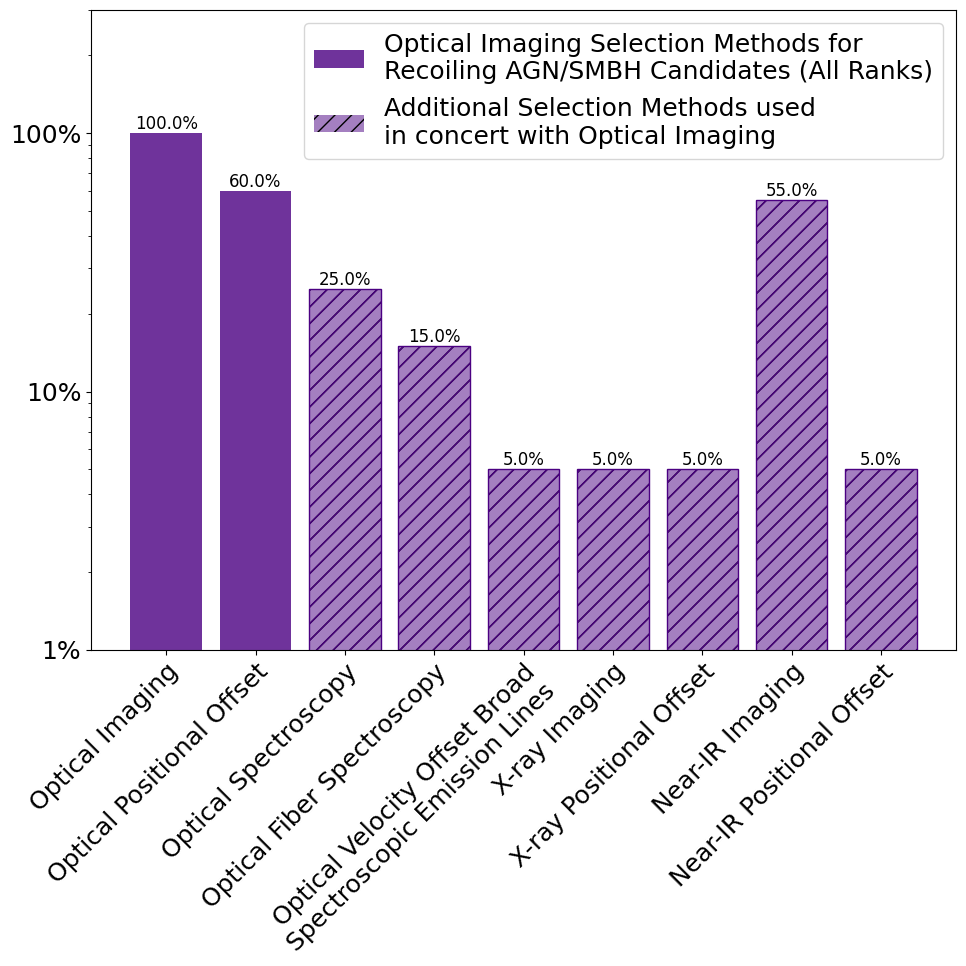

In [37]:
# here we're testing out the plotting for objects that have optical spectroscopy as a selection technique
#('Near-IR', 'Imaging') *
#('Near-IR', 'Positional Offset') *
#('Optical', 'Colors') *
#('Optical', 'Fiber Spectroscopy') *
#('Optical', 'Imaging') *
#('Optical', 'LOS Radial Velocity Shifts') **
#('Optical', 'Periodicity') **
#('Optical', 'Positional Offset') *
#('Optical', 'Spectroscopy') *
#('Optical', 'Velocity Offset Broad Spectroscopic Emission Lines') *
#('Radio', 'Imaging')*
#('Radio', 'Jet Precession')*
#('Radio', 'X-Shaped Source')*
#('X-ray', 'Imaging') *
#('X-ray', 'Positional Offset') *

band = ['Optical']
tech = ['Imaging','Positional Offset'] #'LOS Radial Velocity Shifts', 'Periodicity' #'Radio-Optical Positional Offsets',
#'Double-Peaked Broad Spectroscopic Emission Lines', #'Colors'
band2 = ['X-ray']
tech2 = ['Imaging','Positional Offset']
band3 = ['Near-IR']
tech3 = ['Imaging','Positional Offset']
#band6 = ['Radio']
#tech6 = ['Imaging'] #'Double Sources','Radio-Optical Positional Offsets','X-Shaped Source'


bars = tech
num = []

filter_selection = get_selection_method('Optical', 'Imaging')
gandalf = MAC3[MAC3.apply(filter_selection, axis=1)]

# we need to drop this object: SDSSJ152806.63+132345.8 / J1528+1323
names=['SDSSJ152806.63+132345.8 / J1528+1323','E1821+643']
for i in names:
    for index, row in gandalf.iterrows():
        if row['Name1']==str(i):
            gandalf.drop(index, inplace=True)



print(len(gandalf))
norm = len(gandalf)


for i in band:
    for j in tech:
        filter_selection = get_selection_method(str(i), str(j))
        df_selection = gandalf[gandalf.apply(filter_selection, axis=1)]
        if j=='Optical Velocity Offset Broad Spectroscopic Emission Lines':
            num.append((len(df_selection)-8)/norm) 
            print(str(len(df_selection)) + ' ' + str(i) + ' ' + str(j))
        else:
            num.append(len(df_selection)/norm) 
            print(str(len(df_selection)) + ' ' + str(i) + ' ' + str(j))

tech1 = []            
for i in tech:
    tech1.append('Optical '+str(i))
        
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
fig, (ax1) = plt.subplots(1, 1, figsize=(10,10))
plt.rcParams.update({'font.size': 18})

#ax1.bar(tech, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.8, label='Radio Selection Methods')

bars = ax1.bar(tech1, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.8, label='Optical Imaging Selection Methods for\nRecoiling AGN/SMBH Candidates (All Ranks)')
for bar in bars:
    height = bar.get_height()
    if height>0.0001:
        percentage = f'{100*height:.1f}%'
        ax1.text(bar.get_x() + bar.get_width() / 2, height, percentage,
                ha='center', va='bottom', fontsize=12)
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')

   

techadd=[]
num=[]

band20 = ['Optical']
tech20 = ['Spectroscopy','Fiber Spectroscopy','Velocity Offset Broad Spectroscopic Emission Lines']
for i in band20:
    for j in tech20:
        filter_selection = get_selection_method(str(i), str(j))
        df_selection = gandalf[gandalf.apply(filter_selection, axis=1)]
        if j=='Optical Velocity Offset Broad Spectroscopic Emission Lines':
            num.append((len(df_selection)-8)/norm) 
            print(str(len(df_selection)) + ' ' + str(i) + ' ' + str(j))
        else:
            num.append(len(df_selection)/norm) 
            print(str(len(df_selection)) + ' ' + str(i) + ' ' + str(j))

for i in tech20:
    techadd.append('Optical '+str(i))


for k in band2:
    for m in tech2:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        num.append(len(df_selection2)/norm)
        print(str(len(df_selection2)) + ' ' + str(k) + ' ' + str(m))

for i in tech2:
    techadd.append('X-ray '+str(i))

for k in band3:
    for m in tech3:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        num.append(len(df_selection2)/norm)
        print(str(len(df_selection2)) + ' ' + str(k) + ' ' + str(m))

for i in tech3:
    techadd.append('Near-IR '+str(i))

#for k in band6:
#    for m in tech6:
#        filter_selection = get_selection_method(str(k), str(m))
#        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
#        if m =='Imaging':
#            num.append((len(df_selection2)-2)/norm) # subtracting 1 from Yang+2019 and 1 from blundell I think
#        else:
#            num.append((len(df_selection2))/norm) 
#        print(str(len(df_selection2)) + ' ' + str(k) + ' ' + str(m))
#
#for i in tech6:
#    techadd.append('Radio '+str(i))
    

bars = ax1.bar(techadd, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.5, hatch='//', label='Additional Selection Methods used\nin concert with Optical Imaging')
bars_hatch = ax1.bar(techadd, num, width=0.8, bottom=None, align='center', log=True, edgecolor='indigo', color='none', hatch='//')
#xlabels =  ax1.get_xticklabels()
ax1.set_xticklabels(tech1+techadd, rotation=45, ha='right', rotation_mode='anchor')
#ax1.text(0.2, 0.9, 'Object Class: Dual AGN/SMBH Candidates\nSelection Breakdown: Radio Imaging', transform=ax1.transAxes, fontsize=18)

for bar in bars:
    height = bar.get_height()
    if height>0.0001:
        percentage = f'{100*height:.1f}%'
        ax1.text(bar.get_x() + bar.get_width() / 2, height, percentage,
                ha='center', va='bottom', fontsize=12)
current_labels = [label.get_text() for label in ax1.get_xticklabels()]
# Update the specific label
xlabels = ['Optical Velocity Offset Broad\nSpectroscopic Emission Lines' if label == 'Optical Velocity Offset Broad Spectroscopic Emission Lines' else label for label in current_labels]

ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')

ax1.legend()


# the second bar chart will go below here...
#
#
#
#tech = []
#num = []
#
#
#bars = ax2.bar(tech, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.2, hatch='x', label='Selection Methods Independent of Optical\nSpectroscopy that Recover the Same Objects')
#xlabels = ax2.get_xticklabels()
#ax2.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
#ax2.legend()
#
#for bar in bars:
#    height = bar.get_height()
#    if height>0.0001:
#        percentage = f'{100*height:.1f}%'
#        ax2.text(bar.get_x() + bar.get_width() / 2, height, percentage,
#                ha='center', va='bottom', fontsize=12)

ax1.set_ylim([0.01, 3]) 
#ax2.set_ylim([0.0001, 2.8]) 
#ax2.remove()
plt.rcParams['axes.formatter.min_exponent'] = 3
ax1.set_yticklabels(['0.1%','1%','10%','100%'])

plt.tight_layout()
plt.savefig('RecoilAGN_SelectMethodFigs/recoil_breakdown_optimaging.pdf', dpi=150)
plt.show()



In [22]:
gandalf[['Name1','Paper(s)','Primary System Type','Secondary System Type','Tertiary System Type',\
        'Parsed Selection Method','Parsed Analysis Method','Parsed Confirmation Method']]




,Name1,Paper(s),Primary System Type,Secondary System Type,Tertiary System Type,Parsed Selection Method,Parsed Analysis Method,Parsed Confirmation Method
2729,COSMOS J100043.15+020637.2 / CID-42,Comerford+2009b; Civano+2010; Civano+2012; Ble...,Dual AGN Candidate,Recoil Candidate,-99,{'Optical': ['Imaging']},"{'Optical': ['Fiber Spectroscopy', 'Imaging', ...",{}
2730,CXOJ122518.6+144545 Off Nuclear,Jonker+2010 ; Heida+2015,Recoil Candidate,-99,-99,"{'Optical': ['Fiber Spectroscopy', 'Imaging', ...","{'Optical': ['Fiber Spectroscopy', 'Imaging', ...",{}
2968,HE0450-2958,Magain+2005 ; Haehnelt+2006 ; Letawe+2009,Dual AGN Candidate,Recoil Candidate,-99,{'Optical': ['Imaging']},"{'Near-IR': ['Imaging'], 'Optical': ['Imaging'...",{}
2983,M87*,Batcheldor+2010,Recoil Candidate,-99,-99,"{'Optical': ['Imaging', 'Positional Offset']}","{'Optical': ['Imaging', 'Positional Offset']}",{}
3043,NGC 4636,Lena+2014,Recoil Candidate,-99,-99,"{'Near-IR': ['Imaging'], 'Optical': ['Imaging'...","{'Near-IR': ['Imaging'], 'Optical': ['Imaging'...",{}
3044,NGC 4696,Lena+2014,Recoil Candidate,-99,-99,"{'Near-IR': ['Imaging'], 'Optical': ['Imaging'...","{'Near-IR': ['Imaging'], 'Optical': ['Imaging'...",{}
3045,NGC 5419,Lena+2014,Recoil Candidate,-99,-99,"{'Near-IR': ['Imaging'], 'Optical': ['Imaging'...","{'Near-IR': ['Imaging'], 'Optical': ['Imaging'...",{}
3046,NGC 5846,Lena+2014,Recoil Candidate,-99,-99,"{'Near-IR': ['Imaging'], 'Optical': ['Imaging'...","{'Near-IR': ['Imaging'], 'Optical': ['Imaging'...",{}
3047,IC 4296,Lena+2014,Recoil Candidate,-99,-99,"{'Near-IR': ['Imaging', 'Positional Offset'], ...","{'Near-IR': ['Imaging', 'Positional Offset'], ...",{}
3048,IC 4931,Lena+2014,Recoil Candidate,-99,-99,"{'Near-IR': ['Imaging'], 'Optical': ['Imaging'...","{'Near-IR': ['Imaging'], 'Optical': ['Imaging'...",{}


In [31]:
test = gandalf.copy()
for index, row in gandalf.iterrows():
    if 'Velocity Offset' not in row['Processed Selection Method']:
        test.drop(index, inplace=True)

test[['Name1','Paper(s)','Primary System Type','Secondary System Type','Tertiary System Type',\
        'Parsed Selection Method','Parsed Analysis Method','Parsed Confirmation Method']]



,Name1,Paper(s),Primary System Type,Secondary System Type,Tertiary System Type,Parsed Selection Method,Parsed Analysis Method,Parsed Confirmation Method
5564,142314.18+505537.2 / SBS 1421+511 QSO,Liu+2014 ; Sun+2016,Dual AGN Candidate,Binary SMBH Candidate,Recoil Candidate,"{'Optical': ['Fiber Spectroscopy', 'Imaging', ...","{'Optical': ['Fiber Spectroscopy', 'Imaging', ...",{}


In [ ]:
# now near-IR imaging


In [23]:
# now we're going to work on making individual plot comparisons for the dual AGN candidates....
filter_selection = get_selection_method('Near-IR', 'Imaging')
df_selection = MAC3[MAC3.apply(filter_selection, axis=1)]
print(len(df_selection))
#df_selection['Parsed Selection Method'].unique()


12


In [24]:
data = df_selection['Parsed Selection Method'].unique()
dicts = [ast.literal_eval(d) for d in data]

# Step 2: Aggregate all entries into a single list
all_entries = []
for d in dicts:
    for key, values in d.items():
        for value in values:
            all_entries.append((key, value))

# Step 3: Remove duplicates by converting list of tuples into a set
unique_entries = set(all_entries)

# Optionally, convert back to list of dictionaries or keep as list of tuples
#unique_dicts = [{k: v} for k, v in unique_entries]

#print(unique_dicts)
unique_entries_list = list(unique_entries)

# Sort the list by the first element of each tuple (the key) and then by the second element (the value)
sorted_unique_entries = sorted(unique_entries_list, key=lambda x: (x[0], x[1]))

for i in sorted_unique_entries:
    print(i)

('Near-IR', 'Imaging')
('Near-IR', 'Positional Offset')
('Optical', 'Imaging')
('Optical', 'Positional Offset')
('Radio', 'Imaging')


12
12 Near-IR Imaging
2 Near-IR Positional Offset
11 Optical Imaging
10 Optical Positional Offset
1 Radio Imaging


/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_4860/2206691255.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_4860/2206691255.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(tech+techadd, rotation=45, ha='right', rotation_mode='anchor')
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_4860/2206691255.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_4860/2206691255.py:104: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')


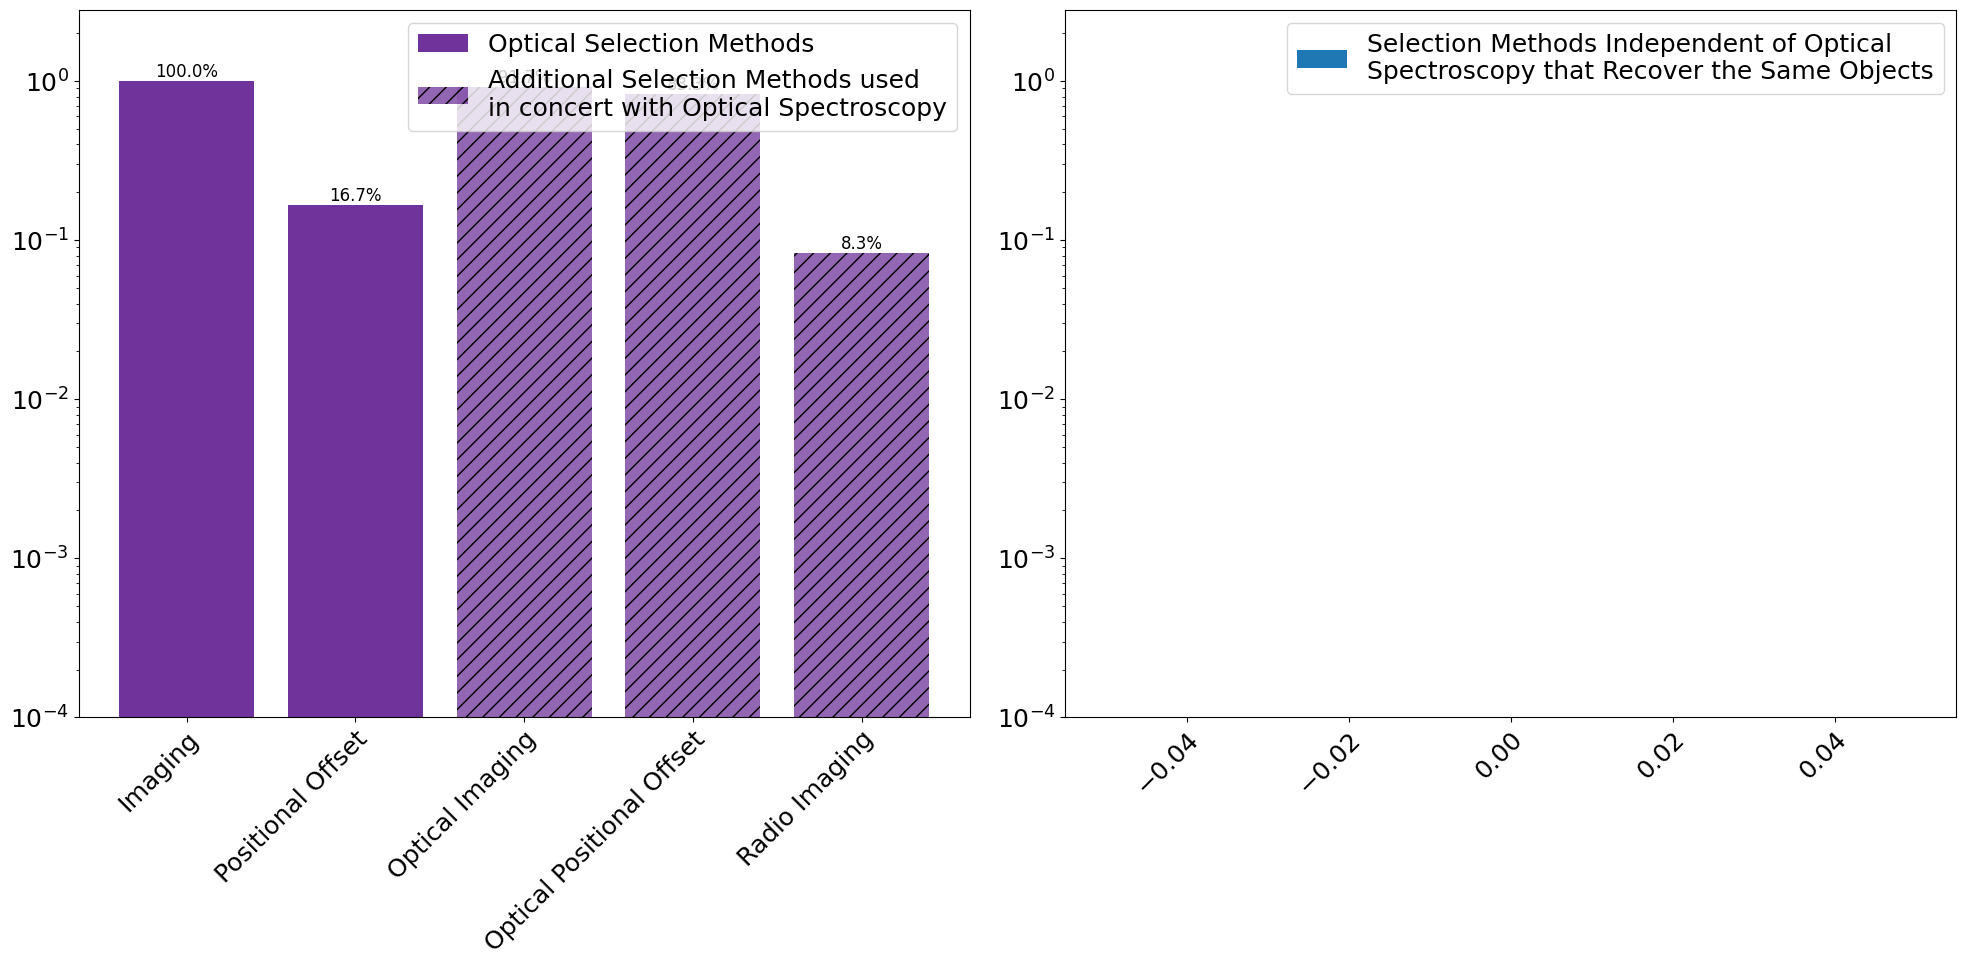

In [46]:
# here we're testing out the plotting for objects that have optical spectroscopy as a selection technique
#('Near-IR', 'Imaging')*
#('Near-IR', 'Positional Offset') *
#('Optical', 'Imaging') *
#('Optical', 'Positional Offset') *
#('Radio', 'Imaging') *

band = ['Near-IR']
tech = ['Imaging','Positional Offset']
band2 = ['Optical']
tech2 = ['Imaging','Positional Offset'] 
#band2 = ['X-ray']
#tech2 = ['Imaging','Positional Offset']
band6 = ['Radio']
tech6 = ['Imaging'] #'Double Sources','Radio-Optical Positional Offsets','X-Shaped Source'


bars = tech
num = []

filter_selection = get_selection_method('Near-IR', 'Imaging')
gandalf = MAC3[MAC3.apply(filter_selection, axis=1)]
print(len(gandalf))
norm = len(gandalf)

for i in band:
    for j in tech:
        filter_selection = get_selection_method(str(i), str(j))
        df_selection = gandalf[gandalf.apply(filter_selection, axis=1)]
        num.append(len(df_selection)/norm) 
        print(str(len(df_selection)) + ' ' + str(i) + ' ' + str(j))

for i in tech:
    techadd.append('Near-IR '+str(i))
        
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
plt.rcParams.update({'font.size': 18})

#ax1.bar(tech, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.8, label='Radio Selection Methods')

bars = ax1.bar(tech, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.8, label='Optical Selection Methods')
for bar in bars:
    height = bar.get_height()
    if height>0.0001:
        percentage = f'{100*height:.1f}%'
        ax1.text(bar.get_x() + bar.get_width() / 2, height, percentage,
                ha='center', va='bottom', fontsize=12)
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')

   

techadd=[]
num=[]
for k in band2:
    for m in tech2:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        num.append(len(df_selection2)/norm)
        print(str(len(df_selection2)) + ' ' + str(k) + ' ' + str(m))

for i in tech2:
    techadd.append('Optical '+str(i))


for k in band6:
    for m in tech6:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        num.append((len(df_selection2))/norm)
        print(str(len(df_selection2)) + ' ' + str(k) + ' ' + str(m))

for i in tech6:
    techadd.append('Radio '+str(i))
    

bars = ax1.bar(techadd, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.6, hatch='//', label='Additional Selection Methods used\nin concert with Optical Spectroscopy')
#xlabels =  ax1.get_xticklabels()
ax1.set_xticklabels(tech+techadd, rotation=45, ha='right', rotation_mode='anchor')
#ax1.text(0.2, 0.9, 'Object Class: Dual AGN/SMBH Candidates\nSelection Breakdown: Radio Imaging', transform=ax1.transAxes, fontsize=18)

for bar in bars:
    height = bar.get_height()
    if height>0.0001:
        percentage = f'{100*height:.1f}%'
        ax1.text(bar.get_x() + bar.get_width() / 2, height, percentage,
                ha='center', va='bottom', fontsize=12)
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')

ax1.legend()


# the second bar chart will go below here...



tech = []
num = []


bars = ax2.bar(tech, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.2, hatch='x', label='Selection Methods Independent of Optical\nSpectroscopy that Recover the Same Objects')
xlabels = ax2.get_xticklabels()
ax2.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
ax2.legend()

for bar in bars:
    height = bar.get_height()
    if height>0.0001:
        percentage = f'{100*height:.1f}%'
        ax2.text(bar.get_x() + bar.get_width() / 2, height, percentage,
                ha='center', va='bottom', fontsize=12)

ax1.set_ylim([0.0001, 2.8]) 
ax2.set_ylim([0.0001, 2.8]) 

plt.tight_layout()
plt.savefig('recoil_breakdown_nearIRimaging.pdf', dpi=150)
plt.show()



In [47]:
gandalf[['Name1','Paper(s)','Primary System Type','Secondary System Type','Tertiary System Type',\
        'Parsed Selection Method','Parsed Analysis Method','Parsed Confirmation Method']]




,Name1,Paper(s),Primary System Type,Secondary System Type,Tertiary System Type,Parsed Selection Method,Parsed Analysis Method,Parsed Confirmation Method
2758,NGC 3718 Bulge,Markakis+2015,Recoil Candidate,-99,-99,"{'Near-IR': ['Imaging', 'Positional Offset'], ...","{'Near-IR': ['Imaging', 'Positional Offset'], ...",{}
3043,NGC 4636,Lena+2014,Recoil Candidate,-99,-99,"{'Near-IR': ['Imaging'], 'Optical': ['Imaging'...","{'Near-IR': ['Imaging'], 'Optical': ['Imaging'...",{}
3044,NGC 4696,Lena+2014,Recoil Candidate,-99,-99,"{'Near-IR': ['Imaging'], 'Optical': ['Imaging'...","{'Near-IR': ['Imaging'], 'Optical': ['Imaging'...",{}
3045,NGC 5419,Lena+2014,Recoil Candidate,-99,-99,"{'Near-IR': ['Imaging'], 'Optical': ['Imaging'...","{'Near-IR': ['Imaging'], 'Optical': ['Imaging'...",{}
3046,NGC 5846,Lena+2014,Recoil Candidate,-99,-99,"{'Near-IR': ['Imaging'], 'Optical': ['Imaging'...","{'Near-IR': ['Imaging'], 'Optical': ['Imaging'...",{}
3047,IC 4296,Lena+2014,Recoil Candidate,-99,-99,"{'Near-IR': ['Imaging', 'Positional Offset'], ...","{'Near-IR': ['Imaging', 'Positional Offset'], ...",{}
3048,IC 4931,Lena+2014,Recoil Candidate,-99,-99,"{'Near-IR': ['Imaging'], 'Optical': ['Imaging'...","{'Near-IR': ['Imaging'], 'Optical': ['Imaging'...",{}
3049,NGC 1399,Lena+2014,Recoil Candidate,-99,-99,"{'Near-IR': ['Imaging'], 'Optical': ['Imaging'...","{'Near-IR': ['Imaging'], 'Optical': ['Imaging'...",{}
3050,NGC 4168,Lena+2014,Recoil Candidate,-99,-99,"{'Near-IR': ['Imaging'], 'Optical': ['Imaging'...","{'Near-IR': ['Imaging'], 'Optical': ['Imaging'...",{}
3051,NGC 4278,Lena+2014,Recoil Candidate,-99,-99,"{'Near-IR': ['Imaging'], 'Optical': ['Imaging'...","{'Near-IR': ['Imaging'], 'Optical': ['Imaging'...",{}


In [ ]:
# now X-ray Imaging


In [26]:
# now we're going to work on making individual plot comparisons for the dual AGN candidates....
filter_selection = get_selection_method('X-ray', 'Imaging')
df_selection = MAC3[MAC3.apply(filter_selection, axis=1)]
print(len(df_selection))
#df_selection['Parsed Selection Method'].unique()


2


In [27]:
data = df_selection['Parsed Selection Method'].unique()
dicts = [ast.literal_eval(d) for d in data]

# Step 2: Aggregate all entries into a single list
all_entries = []
for d in dicts:
    for key, values in d.items():
        for value in values:
            all_entries.append((key, value))

# Step 3: Remove duplicates by converting list of tuples into a set
unique_entries = set(all_entries)

# Optionally, convert back to list of dictionaries or keep as list of tuples
#unique_dicts = [{k: v} for k, v in unique_entries]

#print(unique_dicts)
unique_entries_list = list(unique_entries)

# Sort the list by the first element of each tuple (the key) and then by the second element (the value)
sorted_unique_entries = sorted(unique_entries_list, key=lambda x: (x[0], x[1]))

for i in sorted_unique_entries:
    print(i)

('Optical', 'Fiber Spectroscopy')
('Optical', 'Imaging')
('Optical', 'Spectroscopy')
('Optical', 'Velocity Offset Broad Spectroscopic Emission Lines')
('X-ray', 'Imaging')
('X-ray', 'Positional Offset')


2
2 X-ray Imaging
2 X-ray Positional Offset
1 Optical Imaging
2 Optical Spectroscopy
2 Optical Fiber Spectroscopy
1 Optical Velocity Offset Broad Spectroscopic Emission Lines


/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_4860/3612668862.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_4860/3612668862.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(tech+techadd, rotation=45, ha='right', rotation_mode='anchor')
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_4860/3612668862.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_4860/3612668862.py:94: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')


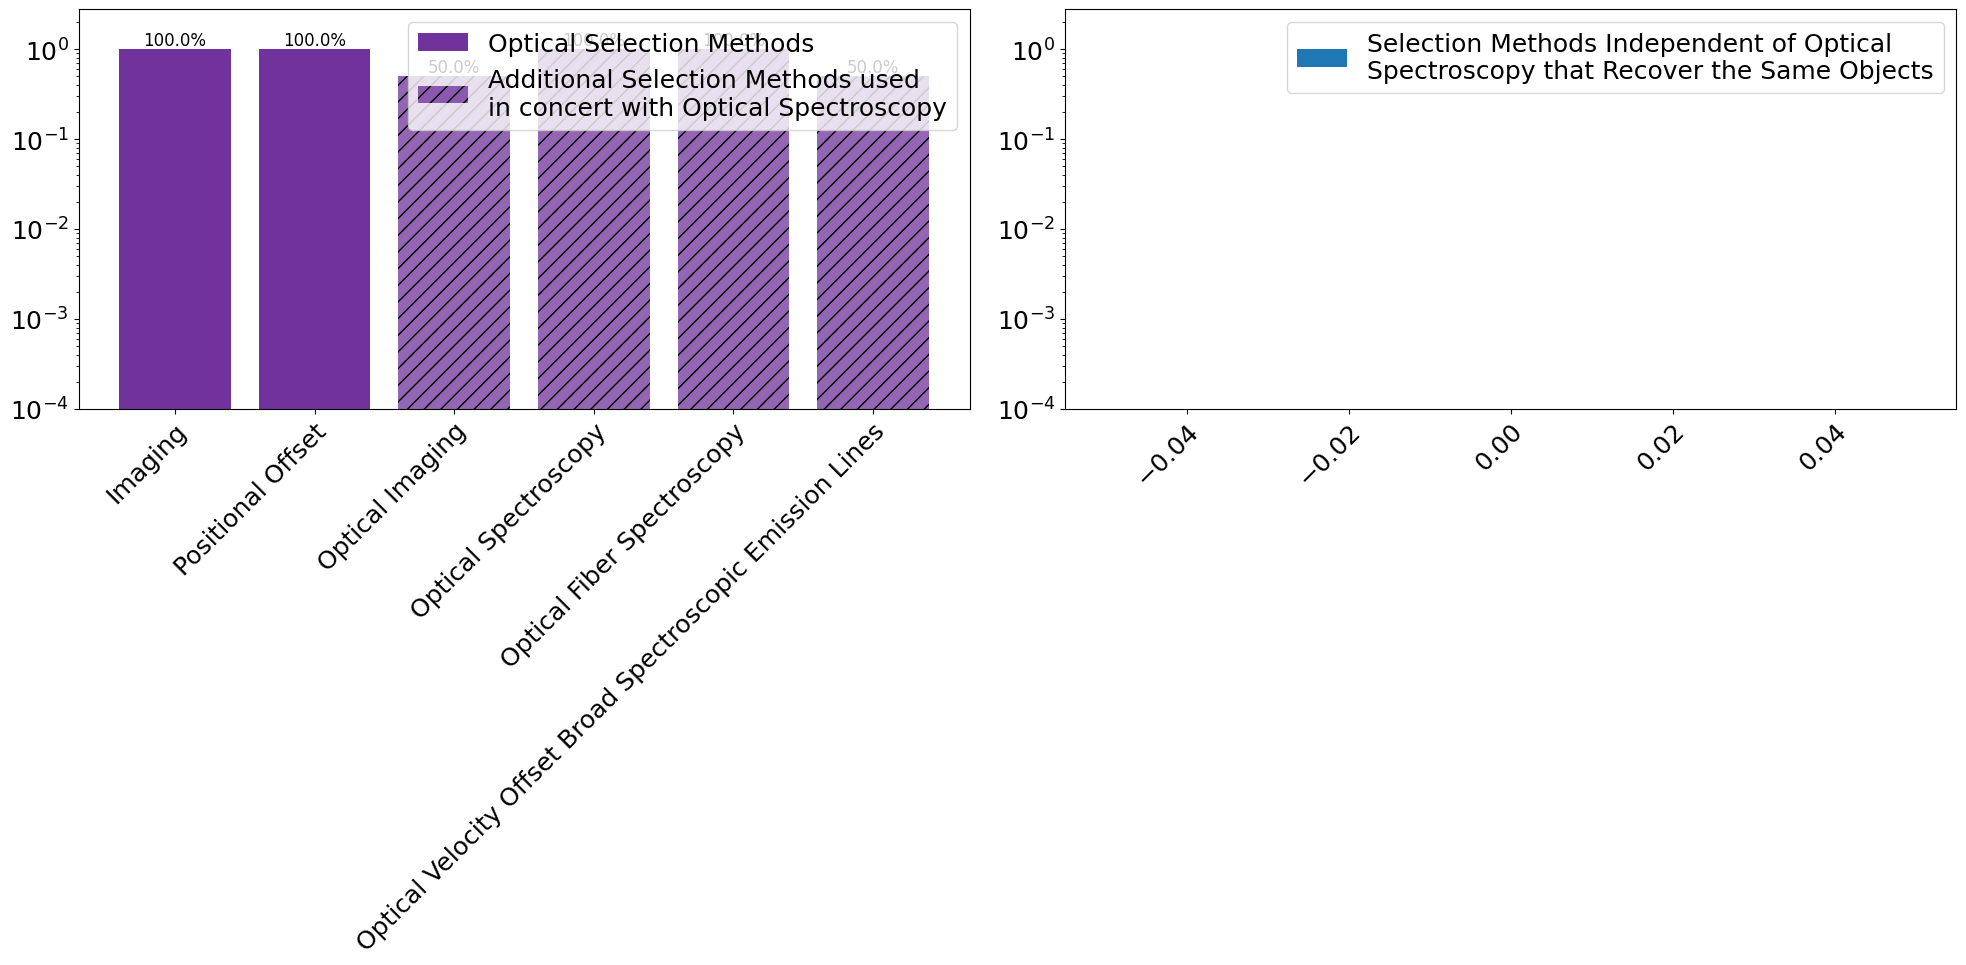

In [48]:
# here we're testing out the plotting for objects that have optical spectroscopy as a selection technique
#('Optical', 'Fiber Spectroscopy') *
#('Optical', 'Imaging') *
#('Optical', 'Spectroscopy') *
#('Optical', 'Velocity Offset Broad Spectroscopic Emission Lines') *
#('X-ray', 'Imaging') *
#('X-ray', 'Positional Offset') *

band2 = ['Optical']
tech2 = ['Imaging','Spectroscopy','Fiber Spectroscopy',\
        'Velocity Offset Broad Spectroscopic Emission Lines'] 
band = ['X-ray']
tech = ['Imaging','Positional Offset']
#band6 = ['Radio']
#tech6 = ['Imaging','Jet Precession','X-Shaped Source'] #'Double Sources','Radio-Optical Positional Offsets','X-Shaped Source'


bars = tech
num = []

filter_selection = get_selection_method('X-ray', 'Imaging')
gandalf = MAC3[MAC3.apply(filter_selection, axis=1)]
print(len(gandalf))
norm = len(gandalf)

for i in band:
    for j in tech:
        filter_selection = get_selection_method(str(i), str(j))
        df_selection = gandalf[gandalf.apply(filter_selection, axis=1)] 
        num.append(len(df_selection)/norm)
        print(str(len(df_selection)) + ' ' + str(i) + ' ' + str(j))

for i in tech:
    techadd.append('X-ray '+str(i))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
plt.rcParams.update({'font.size': 18})

#ax1.bar(tech, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.8, label='Radio Selection Methods')

bars = ax1.bar(tech, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.8, label='Optical Selection Methods')
for bar in bars:
    height = bar.get_height()
    if height>0.0001:
        percentage = f'{100*height:.1f}%'
        ax1.text(bar.get_x() + bar.get_width() / 2, height, percentage,
                ha='center', va='bottom', fontsize=12)
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')

   

techadd=[]
num=[]
for i in band2:
    for j in tech2:
        filter_selection = get_selection_method(str(i), str(j))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)]
        num.append((len(df_selection2))/norm) 
        print(str(len(df_selection2)) + ' ' + str(i) + ' ' + str(j))

for i in tech2:
    techadd.append('Optical '+str(i))
        

bars = ax1.bar(techadd, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.6, hatch='//', label='Additional Selection Methods used\nin concert with Optical Spectroscopy')
#xlabels =  ax1.get_xticklabels()
ax1.set_xticklabels(tech+techadd, rotation=45, ha='right', rotation_mode='anchor')
#ax1.text(0.2, 0.9, 'Object Class: Dual AGN/SMBH Candidates\nSelection Breakdown: Radio Imaging', transform=ax1.transAxes, fontsize=18)

for bar in bars:
    height = bar.get_height()
    if height>0.0001:
        percentage = f'{100*height:.1f}%'
        ax1.text(bar.get_x() + bar.get_width() / 2, height, percentage,
                ha='center', va='bottom', fontsize=12)
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')

ax1.legend()


# the second bar chart will go below here...



tech = []
num = []


bars = ax2.bar(tech, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.2, hatch='x', label='Selection Methods Independent of Optical\nSpectroscopy that Recover the Same Objects')
xlabels = ax2.get_xticklabels()
ax2.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
ax2.legend()

for bar in bars:
    height = bar.get_height()
    if height>0.0001:
        percentage = f'{100*height:.1f}%'
        ax2.text(bar.get_x() + bar.get_width() / 2, height, percentage,
                ha='center', va='bottom', fontsize=12)

ax1.set_ylim([0.0001, 2.8]) 
ax2.set_ylim([0.0001, 2.8]) 

plt.tight_layout()
plt.savefig('recoil_breakdown_xrayimaging.pdf', dpi=150)
plt.show()



In [49]:
gandalf[['Name1','Paper(s)','Primary System Type','Secondary System Type','Tertiary System Type',\
        'Parsed Selection Method','Parsed Analysis Method','Parsed Confirmation Method']]




,Name1,Paper(s),Primary System Type,Secondary System Type,Tertiary System Type,Parsed Selection Method,Parsed Analysis Method,Parsed Confirmation Method
2730,CXOJ122518.6+144545 Off Nuclear,Jonker+2010 ; Heida+2015,Recoil Candidate,-99,-99,"{'Optical': ['Fiber Spectroscopy', 'Imaging', ...","{'Optical': ['Fiber Spectroscopy', 'Imaging', ...",{}
3098,CXO J101527.2+625911,Kim+2017,Recoil Candidate,-99,-99,"{'Optical': ['Fiber Spectroscopy', 'Spectrosco...","{'Optical': ['Fiber Spectroscopy', 'Imaging', ...",{}
